# Statistical analysis is becoming more and more important in many sports including basketball. Teams are organizing analytics teams in their organization and makes many in-game and off-the-court decisions based on the data provided. This project is an attempt to visualize the analytics being used in the NBA and to derive interesting relationships between variables that are in the game of basketball.


# One big difference between the current NBA and the NBA of Michael Jordan's time is the use of the 3-point shot.
# Since the appearence of Stephen Curry in the NBA in 2009, the use of the 3-point shot has increased significantly.

# The increase in 3-point shot attempts can be seen clearly in the below plot.
# The data was web-scraped from a baketball statistics website.

In [ ]:

from bs4 import BeautifulSoup
import pandas
import  numpy
import datetime
import requests
from urllib.request import urlopen, Request
import re


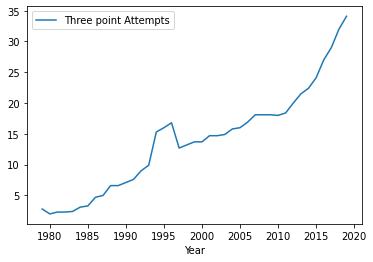

In [ ]:
hdr = {'User-Agent': 'Safari/13.1'}
r = Request('https://www.basketball-reference.com/leagues/NBA_stats_per_game.html', headers=hdr)

resp = urlopen(r)

respData = resp.read()

data = BeautifulSoup(respData)

table = data.find(id="stats")
table = table.find("tbody")
rows = table.find_all("tr")

years = []
three_points_attempt = []
year = 2020
for x in range(45):
  cols = rows[x].find_all("td")
  if not cols:
    continue
  else:
    year = year-1
    count = str(cols[10].renderContents())
    count = count[2:-1]
    three_points_attempt.append(float(count))
    years.append(year)

df = pandas.DataFrame()
df["Three point Attempts"] = three_points_attempt
df["Year"] = years
df.plot(y="Three point Attempts",x="Year")

# In the plot, the section between 2009 and 2019 season shows a high slope indicating a radical increase in the data.

# In sports, one of the most important things would be the question " How can we win?". In the end, the sports analystics used are there to figure out this question. Although, winning a basketball game deals with complex situations, this project will attempt to give insight on what in-game variable(statistic) in the NBA has high relation with win percentage.

# Furthermore, we will divide the timeline into two sections. First will be the 10 seasons before Stephen Curry's draft into the NBA, and the second will be the 10 seasons after Stephen Curry's entrance. By doing this, we will attempt to see if the game of basketball in the NBA level really did change after Stephen Curry's appearance 



# Here, we will web-scrape data again from the official NBA website. This time we will look at stats per team for each seasons to look at the relationships betweeen win rate and components of the game.